In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [36]:
# Create Engine using 'hawaii.sqlite' database file
engine = create_engine('sqlite:///../src/hawaii.sqlite')

In [37]:
# Declare a Base using 'automap_base()'
Base = automap_base()

In [38]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [39]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [40]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
first_measurement = session.query(Measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13eb2f400>,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0}

In [43]:
inspector = inspect(engine)
col_inspector = inspector.get_columns('measurement')
for column in col_inspector:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [44]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent)
type(recent)

# this returns a tuple

('2017-08-23',)


sqlalchemy.engine.row.Row

In [45]:
#Find the most recent date in the data set as a single value
recent2 = session.query(func.max(Measurement.date)).scalar()
print(recent2)
type(recent2)

2017-08-23


str

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Need to convert the queried dat from a string into a type usable by datetime 
# -- configured from in class activities
query_recent_date_str = session.query(func.max(Measurement.date)).scalar()

# year_ago_pd = query_recent_date_str - pd.DateOffset(years=1)
start_date = dt.datetime.strptime(query_recent_date_str,'%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
year_ago = start_date - dt.timedelta(days = 365)
print(f"Most recent date on file: {start_date}")
print(f"Precipitation range starts on: {year_ago}")

Most recent date on file: 2017-08-23
Precipitation range starts on: 2016-08-23


In [47]:
# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(Measurement.station,
                             Measurement.date, 
                             Measurement.prcp).\
                    filter(Measurement.date >= year_ago).\
                    order_by(Measurement.date).\
                    all()
                                                               
# # Save the query results as a Pandas DataFrame. Explicitly set the column names
recent_year_precip = pd.DataFrame([(data.date, data.prcp) for data in precip_query]
                  , columns = ['Date', 'Precip']
                  )


# Sort the dataframe by date
recent_year_precip = recent_year_precip.sort_values('Date' , ascending = True)
recent_year_precip


,Date,Precip
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


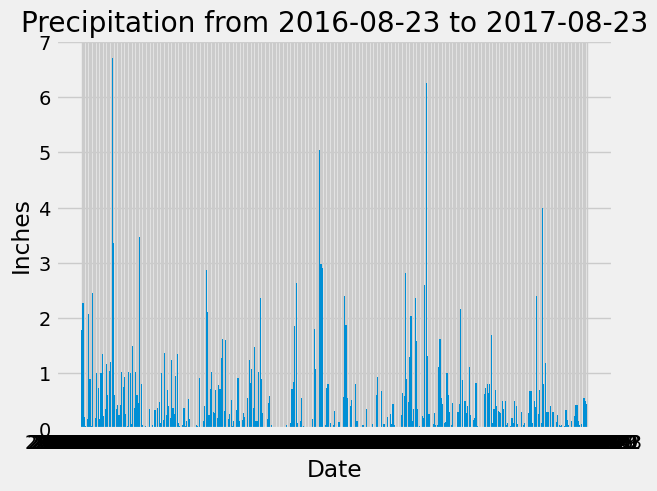

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
# ax = recent_year_precip.plot(kind = 'bar')
# ax.minorticks_off()

# ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
# date_format = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(date_format)
plt.bar(recent_year_precip['Date'],recent_year_precip['Precip'])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title(f"Precipitation from {year_ago} to {start_date}")


plt.show()

Text(0, 0.5, 'Inches')

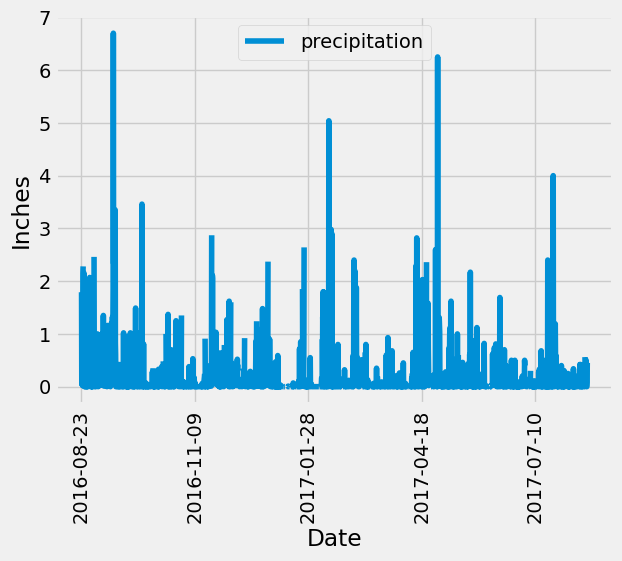

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 



# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

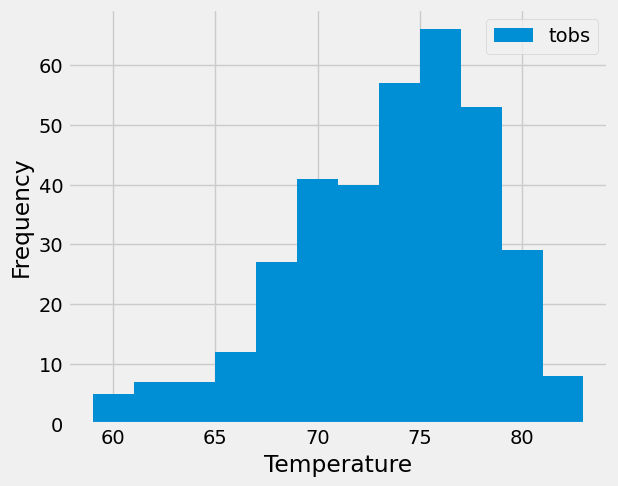

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()